In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CoAID News Articles

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/"
#News Articles
df1 = pd.read_csv(path+'NewsRealCOVID-19-05.csv')
df2 = pd.read_csv(path+'NewsFakeCOVID-19-05.csv')
df1['label'] = 1
df2['label'] = 0

df_May_News = pd.concat([df1, df2]).reset_index(drop=True)
#shuffle
df_May_News = df_May_News.sample(frac=1)
#Remove NaN row if its content is NaN
df_May_News = df_May_News[df_May_News['content'].notna()]
print('May News Articles shape: ',df_May_News.shape)

May News Articles shape:  (1522, 16)


In [5]:
df3 = pd.read_csv(path+'NewsRealCOVID-19-07.csv')
df4 = pd.read_csv(path+'NewsFakeCOVID-19-07.csv')
df3['label'] = 1
df4['label'] = 0

df_July_News = pd.concat([df3, df4]).reset_index(drop=True)
#shuffle
df_July_News = df_July_News.sample(frac=1)
#Remove NaN row if its content is NaN
df_July_News = df_July_News[df_July_News['content'].notna()]
print('July News Articles shape: ',df_July_News.shape)

July News Articles shape:  (1212, 16)


In [6]:
df5 = pd.read_csv(path+'NewsRealCOVID-19-09.csv')
df6 = pd.read_csv(path+'NewsFakeCOVID-19-09.csv')
df5['label'] = 1
df6['label'] = 0

df_Sept_News = pd.concat([df5, df6]).reset_index(drop=True)
#shuffle
df_Sept_News = df_Sept_News.sample(frac=1)
#Remove NaN row if its content is NaN
df_Sept_News = df_Sept_News[df_Sept_News['content'].notna()]
print('Sept News Articles shape: ',df_Sept_News.shape)

Sept News Articles shape:  (847, 16)


In [7]:
df7 = pd.read_csv(path+'NewsRealCOVID-19-11.csv')
df8 = pd.read_csv(path+'NewsFakeCOVID-19-11.csv')
df7['label'] = 1
df8['label'] = 0

df_Nove_News = pd.concat([df7, df8]).reset_index(drop=True)
#shuffle
df_Nove_News = df_Nove_News.sample(frac=1)
#Remove NaN row if its content is NaN
df_Nove_News = df_Nove_News[df_Nove_News['content'].notna()]
print('Nove News Articles shape: ',df_Nove_News.shape)

Nove News Articles shape:  (859, 16)


CoAID Tweet

In [8]:
df9 = pd.read_csv(path+'0501ClaimFakeCOVID-19_tweets_content_1.csv')
df10 = pd.read_csv(path+'0501ClaimRealCOVID-19_tweets_content_1.csv')
df11 = pd.read_csv(path+'0501NewsFakeCOVID-19_tweets_content.csv')
df12 = pd.read_csv(path+'0501NewsRealCOVID-19_tweets_content.csv')
df9['label'] = df11['label'] = 0
df10['label'] = df12['label'] = 1

#combine dataframes
df_May_Tweet = pd.concat([df9,df10,df11,df12]).reset_index(drop=True)
#shuffle
df_May_Tweet = df_May_Tweet.sample(frac=1)
#Remove NaN row if its tweet is NaN
df_May_Tweet = df_May_Tweet[df_May_Tweet['tweet_text'].notna()]
print('May Tweet shape: ',df_May_Tweet.shape)

May Tweet shape:  (95107, 3)


In [9]:
df13 = pd.read_csv(path+'0701ClaimFakeCOVID-19_tweets_content.csv')
df14 = pd.read_csv(path+'0701ClaimRealCOVID-19_tweets_content.csv')
df15 = pd.read_csv(path+'0701NewsFakeCOVID-19_tweets_content.csv')
df16 = pd.read_csv(path+'0701NewsRealCOVID-19_tweets_content.csv')
df13['label'] = df15['label'] = 0
df14['label'] = df16['label'] = 1

#combine dataframes
df_July_Tweet = pd.concat([df13,df14,df15,df16]).reset_index(drop=True)
#shuffle
df_July_Tweet = df_July_Tweet.sample(frac=1)
#Remove NaN row if its content is NaN
df_July_Tweet = df_July_Tweet[df_July_Tweet['tweet_text'].notna()]
print('July Tweet shape: ',df_July_Tweet.shape)

July Tweet shape:  (54098, 3)


In [10]:
df17 = pd.read_csv(path+'0901ClaimRealCOVID-19_tweets_content.csv')
df18 = pd.read_csv(path+'0901NewsFakeCOVID-19_tweets_content.csv')
df19 = pd.read_csv(path+'0901NewsRealCOVID-19_tweets_content.csv')
df18['label'] = 0
df17['label'] = df19['label'] = 1

#combine dataframes
df_Sept_Tweet = pd.concat([df17,df18,df19]).reset_index(drop=True)
#shuffle
df_Sept_Tweet = df_Sept_Tweet.sample(frac=1)
#Remove NaN row if its content is NaN
df_Sept_Tweet = df_Sept_Tweet[df_Sept_Tweet['tweet_text'].notna()]
print('Sept Tweet shape: ',df_Sept_Tweet.shape)

Sept Tweet shape:  (424, 3)


In [11]:
df20 = pd.read_csv(path+'1101ClaimRealCOVID-19_tweets.csv')
df21 = pd.read_csv(path+'1101NewsFakeCOVID-19_tweets.csv')
df22 = pd.read_csv(path+'1101NewsRealCOVID-19_tweets.csv')
df21['label'] = 0
df20['label'] = df22['label'] = 1

#remove repeated useless string - 'Feed generated with FetchRSS'
tweet_update = []

for tweet in df22['tweet_text']:
    if ('Feed generated with FetchRSS') in tweet:
        tweet_update.append(tweet[:len(tweet)-30])
    else:
        tweet_update.append(tweet)
df22['tweet_text'] = tweet_update

#combine dataframes
df_Nove_Tweet = pd.concat([df20,df21,df22]).reset_index(drop=True)
#shuffle
df_Nove_Tweet = df_Nove_Tweet.sample(frac=1)
#Remove NaN row if its content is NaN
df_Nove_Tweet = df_Nove_Tweet[df_Nove_Tweet['tweet_text'].notna()]
print('Nove Tweet shape: ',df_Nove_Tweet.shape)

Nove Tweet shape:  (195, 3)


CoAID Tweet+Reply

In [12]:
df23 = pd.read_csv(path+'0501ClaimFakeCOVID-19_tweets_replies_content_1.csv')
df24 = pd.read_csv(path+'0501ClaimRealCOVID-19_tweets_replies_content_1.csv')
df25 = pd.read_csv(path+'0501NewsFakeCOVID-19_tweets_replies_content.csv')
df26 = pd.read_csv(path+'0501NewsRealCOVID-19_tweets_replies_content.csv')
df23['label'] = df25['label'] = 0
df24['label'] = df26['label'] = 1

#combine dataframes
df_may_reply = pd.concat([df23,df24,df25,df26]).reset_index(drop=True)
#shuffle
df_may_reply = df_may_reply.sample(frac=1)   
#only keep tweet_reply and label columns
df_may_reply = df_may_reply.drop(['tweet_id', 'tweet_text'], axis=1)
#change df_reply column name to tweet_text in order to combine df_reply with df_tweets 
df_may_reply = df_may_reply.rename(columns={"tweet_reply": "tweet_text"})

df_May_Reply = pd.concat([df_May_Tweet,df_may_reply]).reset_index(drop=True)
print('May Tweets & Replies shape: ',df_May_Reply.shape)

May Tweets & Replies shape:  (163053, 3)


In [13]:
df27 = pd.read_csv(path+'0701ClaimFakeCOVID-19_tweets_replies_content.csv')
df28 = pd.read_csv(path+'0701ClaimRealCOVID-19_tweets_replies_content.csv')
df29 = pd.read_csv(path+'0701NewsFakeCOVID-19_tweets_replies_content.csv')
df30 = pd.read_csv(path+'0701NewsRealCOVID-19_tweets_replies_content.csv')
df27['label'] = df29['label'] = 0
df28['label'] = df30['label'] = 1

#combine dataframes
df_july_reply = pd.concat([df27,df28,df29,df30]).reset_index(drop=True)
#shuffle
df_july_reply = df_july_reply.sample(frac=1)   
#only keep tweet_reply and label columns
df_july_reply = df_july_reply.drop(['tweet_id', 'tweet_text'], axis=1)
#change df_reply column name to tweet_text in order to combine df_reply with df_tweets 
df_july_reply = df_july_reply.rename(columns={"tweet_reply": "tweet_text"})

df_July_Reply = pd.concat([df_July_Tweet,df_july_reply]).reset_index(drop=True)
print('July Tweets & Replies shape: ',df_July_Reply.shape)

July Tweets & Replies shape:  (101649, 3)


In [14]:
df31 = pd.read_csv(path+'0901ClaimRealCOVID-19_tweets_replies_content.csv')
df32 = pd.read_csv(path+'0901NewsFakeCOVID-19_tweets_replies_content.csv')
df33 = pd.read_csv(path+'0901NewsRealCOVID-19_tweets_replies_content.csv')
df32['label'] = 0
df31['label'] = df33['label'] = 1

#combine dataframes
df_sept_reply = pd.concat([df31,df32,df33]).reset_index(drop=True)
#shuffle
df_sept_reply = df_sept_reply.sample(frac=1)  
#only keep tweet_reply and label columns
df_sept_reply = df_sept_reply.drop(['tweet_id', 'tweet_text'], axis=1)
#change df_reply column name to tweet_text in order to combine df_reply with df_tweets 
df_sept_reply = df_sept_reply.rename(columns={"tweet_reply": "tweet_text"})
# print("All Tweets Replies shape: ", df_sept_reply.shape)

df_Sept_Reply = pd.concat([df_Sept_Tweet,df_sept_reply]).reset_index(drop=True)
print('Sept Tweets & Replies shape: ',df_Sept_Reply.shape)

Sept Tweets & Replies shape:  (1302, 3)


In [15]:
df34 = pd.read_csv(path+'1101ClaimRealCOVID-19_tweets_replies.csv')
df35 = pd.read_csv(path+'1101NewsFakeCOVID-19_tweets_replies.csv')
df36 = pd.read_csv(path+'1101NewsRealCOVID-19_tweets_replies.csv')
df35['label'] = 0
df34['label'] = df36['label'] = 1

#combine dataframes
df_nove_reply = pd.concat([df34,df35,df36]).reset_index(drop=True)
#shuffle
df_nove_reply = df_nove_reply.sample(frac=1)  
#only keep tweet_reply and label columns
df_nove_reply = df_nove_reply.drop(['tweet_id', 'tweet_text'], axis=1)
#change df_reply column name to tweet_text in order to combine df_reply with df_tweets 
df_nove_reply = df_nove_reply.rename(columns={"tweet_reply": "tweet_text"})

df_Nove_Reply = pd.concat([df_Nove_Tweet,df_nove_reply]).reset_index(drop=True)
print('Nove Tweets & Replies shape: ',df_Nove_Reply.shape)

Nove Tweets & Replies shape:  (673, 3)


In [27]:
CoAID_tweet = pd.concat([df_May_Tweet,df_July_Tweet,df_Sept_Tweet,df_Nove_Tweet]).reset_index(drop=True)
print(CoAID_tweet.shape)

(149824, 3)


In [28]:
CoAID_tweet_reply = pd.concat([df_May_Reply,df_July_Reply,df_Sept_Reply,df_Nove_Reply]).reset_index(drop=True)
print(CoAID_tweet_reply.shape)

(266677, 3)


In [29]:
CoAID_news_articles = pd.concat([df_May_News,df_July_News,df_Sept_News,df_Nove_News]).reset_index(drop=True)
print(CoAID_news_articles.shape)

(4440, 17)


In [44]:
%%time
lemmatizer = WordNetLemmatizer()

CoAID_tweet['text_lemmatized'] = CoAID_tweet['tweet_text'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))
CoAID_tweet_reply['text_lemmatized'] = CoAID_tweet_reply['tweet_text'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))
CoAID_news_articles['text_lemmatized'] = CoAID_news_articles['content'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))


CPU times: user 3min 8s, sys: 890 ms, total: 3min 9s
Wall time: 3min 10s


In [50]:
CoAID_news_articles.shape

(4440, 18)

In [46]:
true_CoAID_tweet = []
mis_CoAID_tweet = []
for row in CoAID_tweet.values:
  if row[2] == 1:
    true_CoAID_tweet.append(row[3])
  if row[2] == 0:
    mis_CoAID_tweet.append(row[3])

print(len(true_CoAID_tweet))
print(len(mis_CoAID_tweet))

140126
9698


In [53]:
true_CoAID_tweet_reply = []
mis_CoAID_tweet_reply = []
for row in CoAID_tweet_reply.values:
  if row[2] == 1:
    true_CoAID_tweet_reply.append(row[3])
  if row[2] == 0:
    mis_CoAID_tweet_reply.append(row[3])

print(len(true_CoAID_tweet_reply))
print(len(mis_CoAID_tweet_reply))

250750
15927


In [55]:
true_CoAID_news = []
mis_CoAID_news = []
for row in CoAID_news_articles.values:
  if row[10] == 1:
    true_CoAID_news.append(row[17])
  if row[10] == 0:
    mis_CoAID_news.append(row[17])

print(len(true_CoAID_news))
print(len(mis_CoAID_news))

4024
416


Text Normalization by Lemmatization

In [60]:
def plot_wordcloud(data):
  texts = ''.join(data)
  wordclod = WordCloud(width = 512,height = 512).generate(texts)
  plt.figure(figsize = (10, 8), facecolor = 'k')
  plt.imshow(wordclod)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()

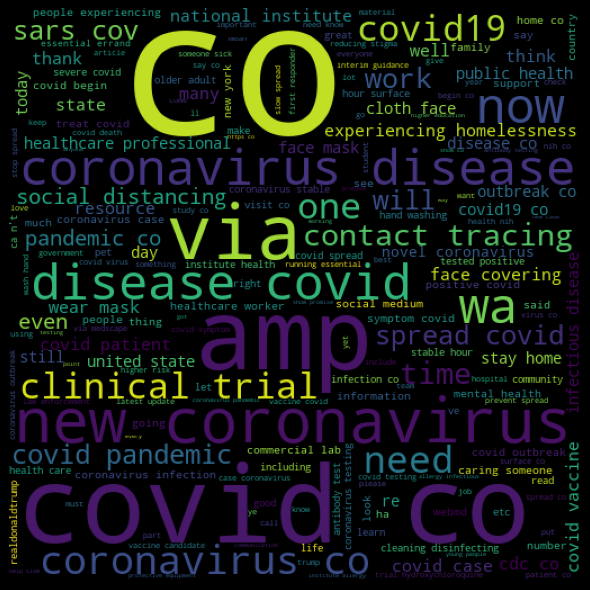

In [61]:
plot_wordcloud(true_CoAID_tweet)

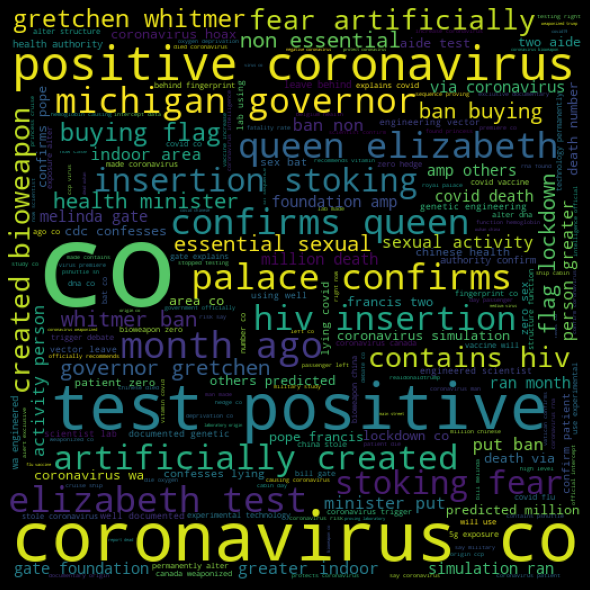

In [62]:
plot_wordcloud(mis_CoAID_tweet)

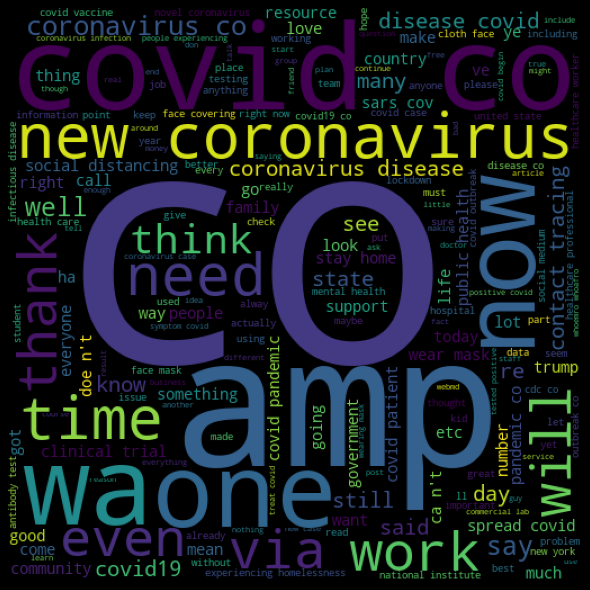

In [65]:
plot_wordcloud(true_CoAID_tweet_reply)

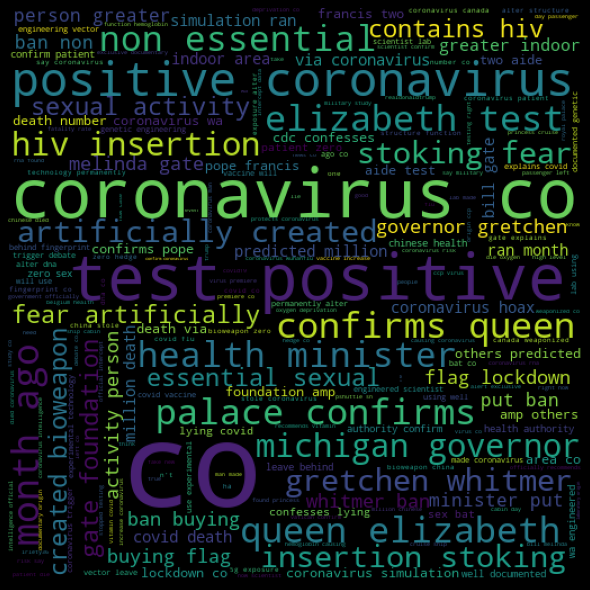

In [66]:
plot_wordcloud(mis_CoAID_tweet_reply)

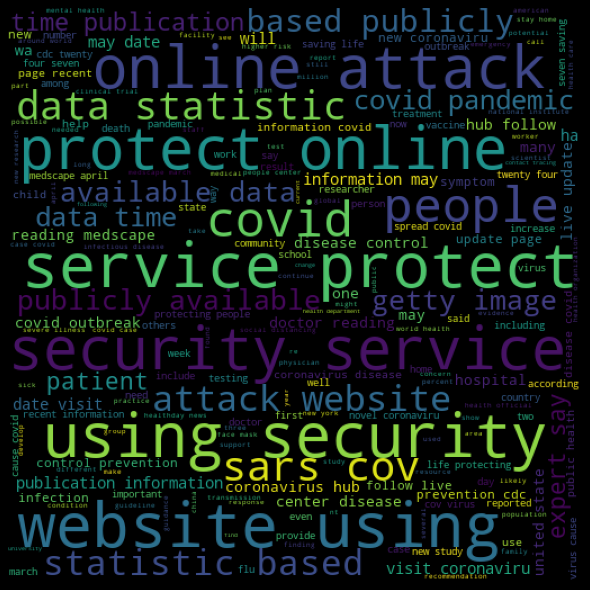

In [63]:
plot_wordcloud(true_CoAID_news)

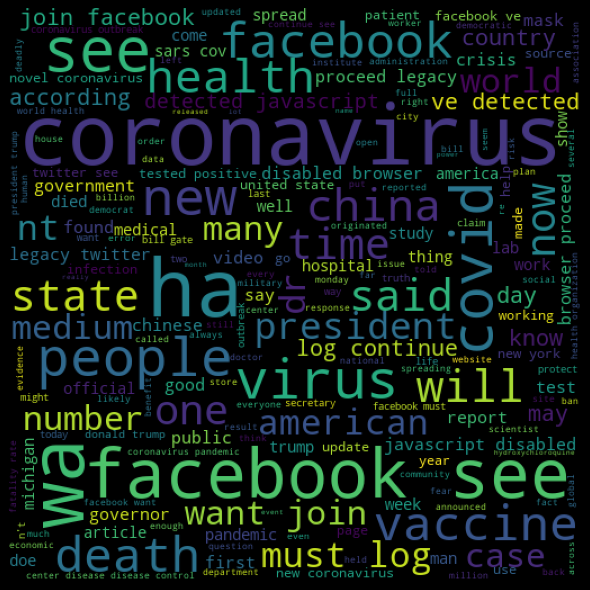

In [64]:
plot_wordcloud(mis_CoAID_news)